In [32]:
from ucimlrepo import fetch_ucirepo 

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [33]:
# prerequisites
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [34]:
import numpy as np

class MyLogisticRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    def fit(self, x, y, learning_rate=0.001, num_epochs=1000):
        self.coef_ = np.zeros(len(x[0]) + 1)  # Initialize coefficients with zeros
        for epoch in range(num_epochs):
            for i in range(len(x)):  # For each sample from the training data
                y_predicted = self.sigmoid(self.eval(x[i]))  # Compute the predicted output
                error = y_predicted - y[i]  # Compute the error for the current sample
                for j in range(len(x[0])):  # Update the coefficients
                    self.coef_[j] -= learning_rate * error * x[i][j]
                self.coef_[-1] -= learning_rate * error  # Update the intercept
        self.intercept_ = self.coef_[-1]
        self.coef_ = self.coef_[:-1]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def eval(self, xi):
        z = self.intercept_
        for j in range(len(xi)):
            z += self.coef_[j] * xi[j]
        return z

    def predict_proba(self, x):
        probabilities = [self.sigmoid(self.eval(xi)) for xi in x]
        return probabilities

    def predict(self, x, threshold=0.7):
        probabilities = self.predict_proba(x)
        predictions = [1 if p >= threshold else 0 for p in probabilities]
        return predictions


In [35]:
def loadData(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariables = [dataNames.index(inputVariabNames[i]) for i in range(len(inputVariabNames))]
    inputs = [[float(data[i][selectedVariable]) for selectedVariable in selectedVariables] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    #   M = 1      B = 0 
    outputs = [1 if data[i][selectedOutput]=='M' else 0 for i in range(len(data))]

    return inputs, outputs

In [36]:
crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'wdbc.data')

inputs, outputs = loadData(filePath, ['radius1','texture1'], "diagnosis")
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [[17.99, 10.38], [20.57, 17.77], [19.69, 21.25], [11.42, 20.38], [20.29, 14.34]]
out:  [1, 1, 1, 1, 1]


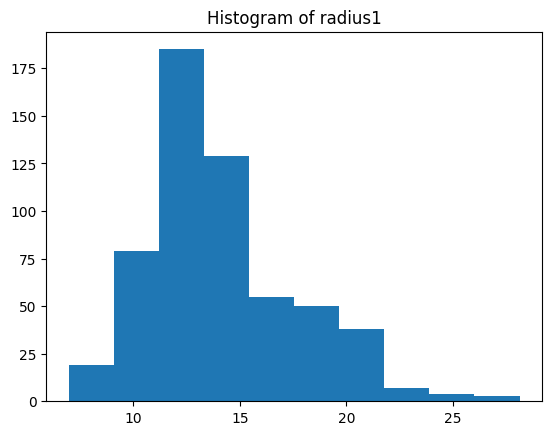

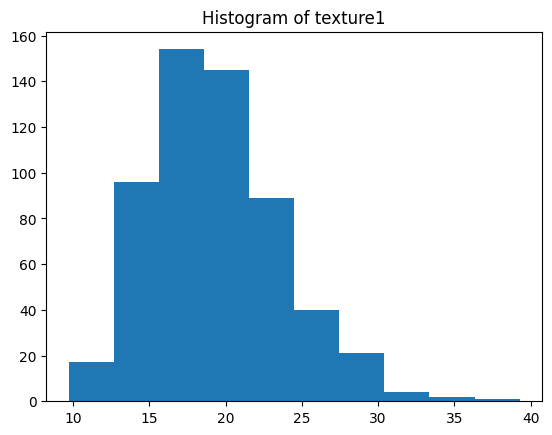

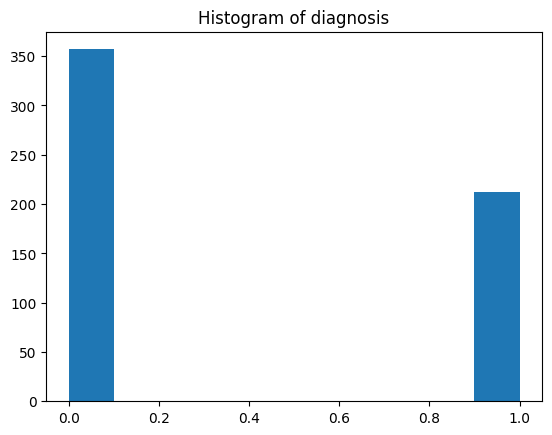

In [37]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()


plotDataHistogram([inputs[i][0] for i in range(len(inputs))], 'radius1')
plotDataHistogram([inputs[i][1] for i in range(len(inputs))], 'texture1')
plotDataHistogram(outputs, 'diagnosis')

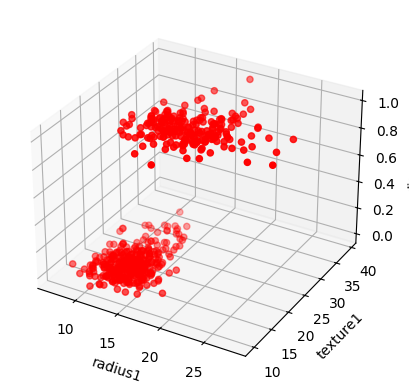

In [38]:
# Extract features from inputs
feature1 = [x[0] for x in inputs]
feature2 = [x[1] for x in inputs]

# Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot inputs against outputs
ax.scatter(feature1, feature2, outputs, c='r', marker='o')

# Label axes
ax.set_xlabel('radius1')
ax.set_ylabel('texture1')
ax.set_zlabel('diagnosis')

plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

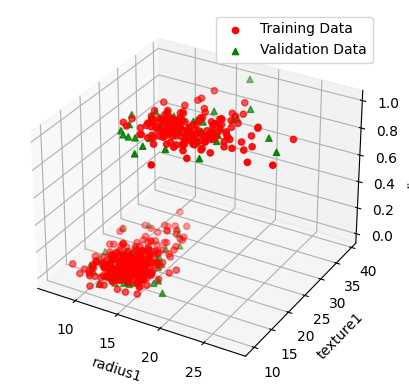

In [40]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
validationInputs = [inputs[i] for i in testSample]
validationOutputs = [outputs[i] for i in testSample]

validationInputs1 = np.array(validationInputs)
validationOutputs1 = np.array(validationOutputs)

trainInputs1 = np.array(trainInputs)
trainOutputs1 = np.array(trainOutputs)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot training data
ax.scatter(trainInputs1[:, 0], trainInputs1[:, 1], trainOutputs1, c='r', marker='o', label='Training Data')

# Plot validation data
ax.scatter(validationInputs1[:, 0], validationInputs1[:, 1], validationOutputs1, c='g', marker='^', label='Validation Data')

ax.set_xlabel('radius1')
ax.set_ylabel('texture1')
ax.set_zlabel('diagnosis')

# Add a legend
plt.legend()

plt.show()



In [41]:
from sklearn.linear_model import LogisticRegression

# Inițializează modelul
# regressor = LogisticRegression()
# regressor.fit(trainInputs, trainOutputs)
# w0 = regressor.intercept_[0]
# w1, w2 = regressor.coef_[0]
# print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1', ' + ', w2, ' * x2')

regressor = MyLogisticRegression()
regressor.fit(trainInputs,  trainOutputs)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1', ' + ', w2, ' * x2')

print("textura de valoare 10 si o raza de valoare 18 este leziune", 'B' if regressor.predict([[10, 18]])==0 else 'M')

the learnt model: f(x) =  -28.974108649953717  +  0.23420710330485894  * x1  +  -0.18150817096763938  * x2
textura de valoare 10 si o raza de valoare 18 este leziune M


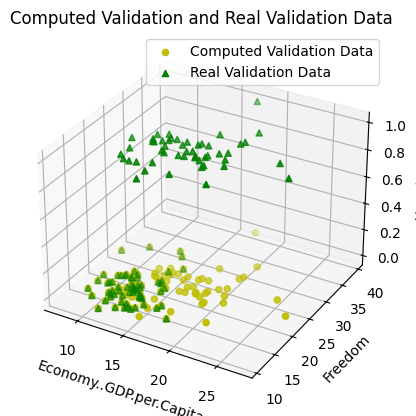

In [42]:
# Extract features from validationInputs
feature1 = [x[0] for x in validationInputs]
feature2 = [x[1] for x in validationInputs]

computedValidationOutputs = regressor.predict(validationInputs)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot computed validation outputs
ax.scatter(feature1, feature2, computedValidationOutputs, c='y', marker='o', label='Computed Validation Data')

# Plot real validation outputs
ax.scatter(feature1, feature2, validationOutputs, c='g', marker='^', label='Real Validation Data')

# Label axes
ax.set_xlabel('Economy..GDP.per.Capita.')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')

# Add a title
plt.title('Computed Validation and Real Validation Data')

# Add a legend
plt.legend()

plt.show()

In [43]:
# compute the differences between the predictions and real outputs
# "manual" computation
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

# by using sklearn
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  0.43859649122807015
prediction error (tool):   0.43859649122807015


In [44]:
from sklearn.model_selection import KFold

# Definirea numărului de pliuri pentru validare încrucișată
num_folds = 5

# Inițializarea KFold
kf = KFold(n_splits=num_folds)

# Inițializarea listelor pentru stocarea erorilor pe fiecare pliu
errors = []

# Iterarea prin fiecare pliu
for train_index, test_index in kf.split(inputs):
    # Divizarea datelor în seturi de antrenare și testare pentru pliul curent
    trainInputs = [inputs[i] for i in train_index]
    trainOutputs = [outputs[i] for i in train_index]
    validationInputs = [inputs[i] for i in test_index]
    validationOutputs = [outputs[i] for i in test_index]
    
    # Antrenarea modelului pe setul de antrenare curent
    regressor = MyLogisticRegression()
    regressor.fit(trainInputs, trainOutputs)
    
    # Testarea modelului pe setul de testare curent
    computedValidationOutputs = regressor.predict(validationInputs)
    
    # Calcularea erorii pe setul de testare curent
    error = mean_squared_error(validationOutputs, computedValidationOutputs)
    
    # Adăugarea erorii la lista de erori
    errors.append(error)

# Calcularea mediei erorilor
average_error = np.mean(errors)

print("Average prediction error across all folds: ", average_error)


Average prediction error across all folds:  0.3723334885887284
